Import **Directories**

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from tifffile import imread
#from csbdeep.utils import Path, normalize
from skimage import io
np.random.seed(42)

Function to add **Artificial Gaussian Noise**

In [63]:
def noisy(image, sigma):
    
    row,col= image.shape
    mean = 0
    img=np.array(image).astype(np.float32)
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = img + gauss
    return noisy

Load Data as **pretrn**, **test** and **test_patch**

In [64]:
X_pretrn= sorted(glob('02_patch/train/images/*.tif'))
Y_pretrn= sorted(glob('02_patch/train/masks/*.tif'))
X_test=sorted(glob('01_original_size/test/images/*.tif'))
Y_test=sorted(glob('01_original_size/test/masks/*.tif'))
X_test_patch= sorted(glob('02_patch/test/images/*.tif'))
Y_test_patch= sorted(glob('02_patch/test/masks/*.tif'))

Text(0.5,1,'Mask (test_patch)')

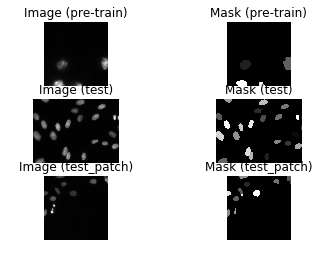

In [65]:
X_pretrn = list(map(imread,X_pretrn))
Y_pretrn = list(map(imread,Y_pretrn))
X_test = list(map(imread,X_test))
Y_test = list(map(imread,Y_test))
X_test_patch = list(map(imread,X_test_patch))
Y_test_patch = list(map(imread,Y_test_patch))
plt.subplot(321); plt.imshow(X_pretrn[9],cmap='gray');
plt.axis('off'); plt.title('Image (pre-train)')
plt.subplot(322); plt.imshow(Y_pretrn[9],cmap='gray');
plt.axis('off'); plt.title('Mask (pre-train)')
plt.subplot(323); plt.imshow(X_test[9],cmap='gray');
plt.axis('off'); plt.title('Image (test)')
plt.subplot(324); plt.imshow(Y_test[9],cmap='gray');
plt.axis('off'); plt.title('Mask (test)')
plt.subplot(325); plt.imshow(X_test_patch[9],cmap='gray');
plt.axis('off'); plt.title('Image (test_patch)')
plt.subplot(326); plt.imshow(Y_test_patch[9],cmap='gray');
plt.axis('off'); plt.title('Mask (test_patch)')

In [66]:
print('number of images: %3d' % len(X))
print('- training+validation:       %3d' % len(X_pretrn))
print('- test:     %3d' % len(X_test))

number of images: 4470
- training+validation:       4470
- test:      50


In [67]:
rng = np.random.RandomState(42)
ind = rng.permutation(len(X_pretrn))
n_val = int(round(0.15 * len(X_pretrn)))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
X_val, Y_val = [X_pretrn[i] for i in ind_val]  , [Y_pretrn[i] for i in ind_val]
X_train, Y_train = [X_pretrn[i] for i in ind_train]  , [Y_pretrn[i] for i in ind_train]
print('number of images: %3d' % len(X))
print('- training:       %3d' % len(X_train))
print('- validation:     %3d' % len(X_val))

number of images: 4470
- training:       3800
- validation:     670


In [68]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)

2.0 30.0
0.0 22.0


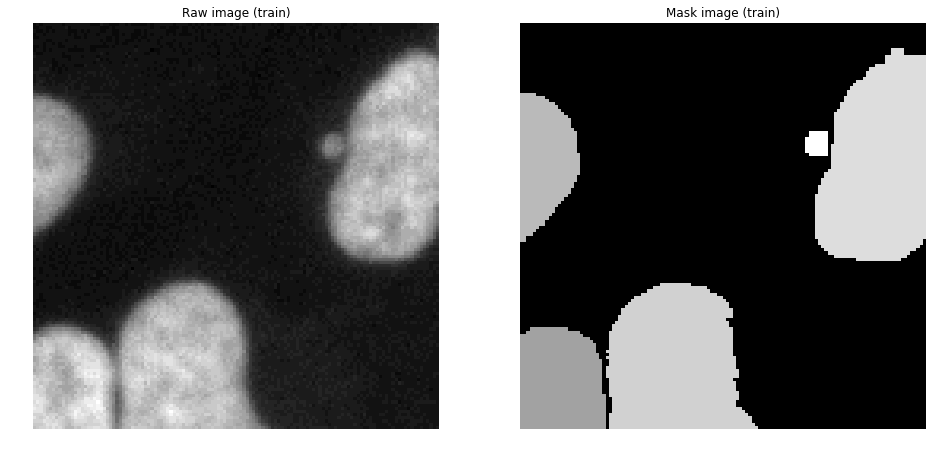

In [69]:
i = 9
img, lbl = X_train[i], Y_train[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image (train)')
plt.subplot(122); plt.imshow(lbl,cmap='gray');   plt.axis('off'); plt.title('Mask image (train)')

print(np.min(img),np.max(img))
print(np.min(lbl),np.max(lbl))

In [51]:
std=10.0
X_train10 = np.array([noisy(x,std) for x in tqdm(X_train)])
X_test10 = np.array([noisy(x,std) for x in tqdm(X_test)])
X_val10 = np.array([noisy(x,std) for x in tqdm(X_val)])

std=20.0
X_train20 = np.array([noisy(x,std) for x in tqdm(X_train)])
X_test20 = np.array([noisy(x,std) for x in tqdm(X_test)])
X_val20 = np.array([noisy(x,std) for x in tqdm(X_val)])

100%|██████████| 670/670 [00:00<00:00, 1696.46it/s]


-34.94637439378588 64.76868187731999
-68.34345088289803 95.29877948582225


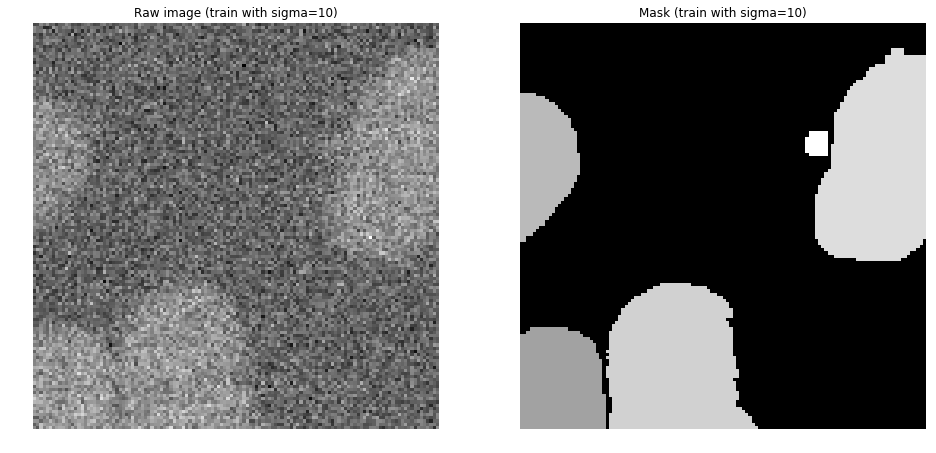

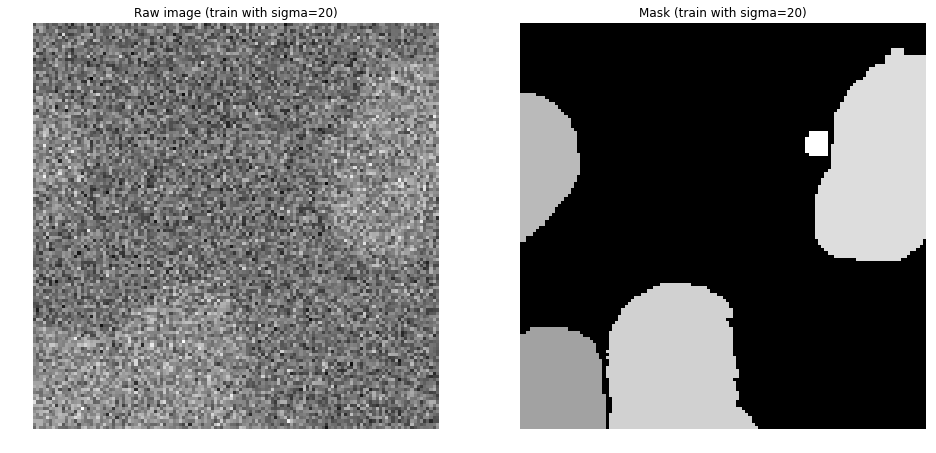

In [52]:
i = 9
img, lbl = X_train10[i], Y_train[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image (train with sigma=10)')
plt.subplot(122); plt.imshow(lbl,cmap='gray');   plt.axis('off'); plt.title('Mask (train with sigma=10)')
print(np.min(img),np.max(img))

i = 9
img, lbl = X_train20[i], Y_train[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image (train with sigma=20)')
plt.subplot(122); plt.imshow(lbl,cmap='gray');   plt.axis('off'); plt.title('Mask (train with sigma=20)')
None;
print(np.min(img),np.max(img))

In [13]:
np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/TrainVal.npz", X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val)
np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/Test.npz", X_test=X_test, Y_test=Y_test)

In [14]:

np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/TrainVal10.npz",  X_train=X_train10, Y_train=Y_train, X_val=X_val10, Y_val=Y_val)
np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/Test10.npz", X_test=X_test10, Y_test=Y_test)

In [15]:

np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/TrainVal20.npz",  X_train=X_train20, Y_train=Y_train, X_val=X_val20, Y_val=Y_val)
np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/Test20.npz", X_test=X_test20, Y_test=Y_test)

In [24]:
b=np.load('/Volumes/Data/StarVoid/Sim/NumpyData/TrainVal20.npz')

In [25]:
b['X_val'].shape

(18, 768, 736)

In [26]:
b['X_train'].shape

(102, 768, 736)

Noise2Void Data Prep

In [19]:
X_trainN2V=np.concatenate((X_train,X_test[:,:768,:736]))
X_valN2V=X_val
print(X_train10.shape)
print(X_test10.shape)

X_trainN2V10=np.concatenate((X_train10,X_test10[:,:768,:736]))
X_valN2V10=X_val10

X_trainN2V20=np.concatenate((X_train20,X_test20[:,:768,:736]))
X_valN2V20=X_val20

np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/TrainValN2V.npz",  X_train=X_trainN2V, X_val=X_valN2V)
np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/TrainValN2V10.npz",  X_train=X_trainN2V10, X_val=X_valN2V10)
np.savez_compressed("/Volumes/Data/StarVoid/Sim/NumpyData/TrainValN2V20.npz",  X_train=X_trainN2V20, X_val=X_valN2V20)


(102, 768, 736)
(30, 773, 739)
